# 分离手写体

In [153]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
def imshow(img,*args,**kwargs):
    fig, axes=plt.subplots(figsize=(10,10))
    axes.imshow(img,*args,**kwargs)
    axes.axis('off')

提取png图片的手写体

## 读取图片

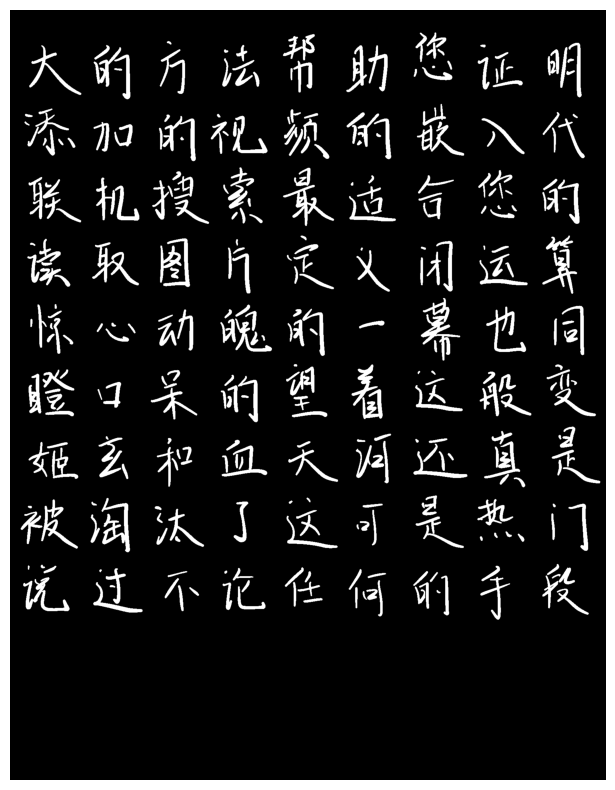

In [155]:
img_path=Path("./3.jpg")
img=cv2.imread(str(img_path))
img_copy=img.copy()
gray=255-cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,binary_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
imshow(binary_thresh,cmap='gray')

In [156]:
gray.shape,binary_thresh.shape

((2157, 1668), (2157, 1668))

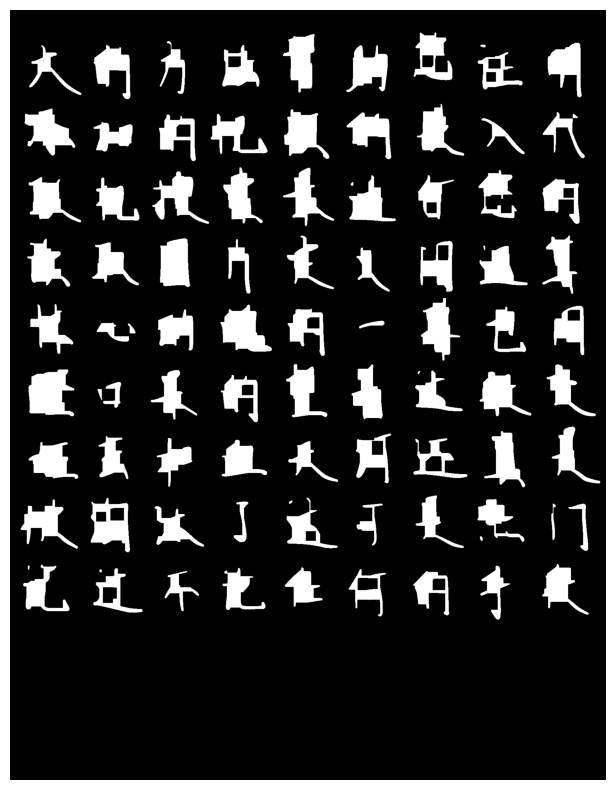

In [157]:
# 定义闭运算的内核大小
kernel_size=27
kernel = np.ones((kernel_size, kernel_size), np.uint8)
# 进行闭运算
closing = cv2.morphologyEx(binary_thresh, cv2.MORPH_CLOSE, kernel)
imshow(closing,cmap='gray')

In [158]:
closing.dtype,closing.shape,closing.min(),closing.max()

(dtype('uint8'), (2157, 1668), 0, 255)

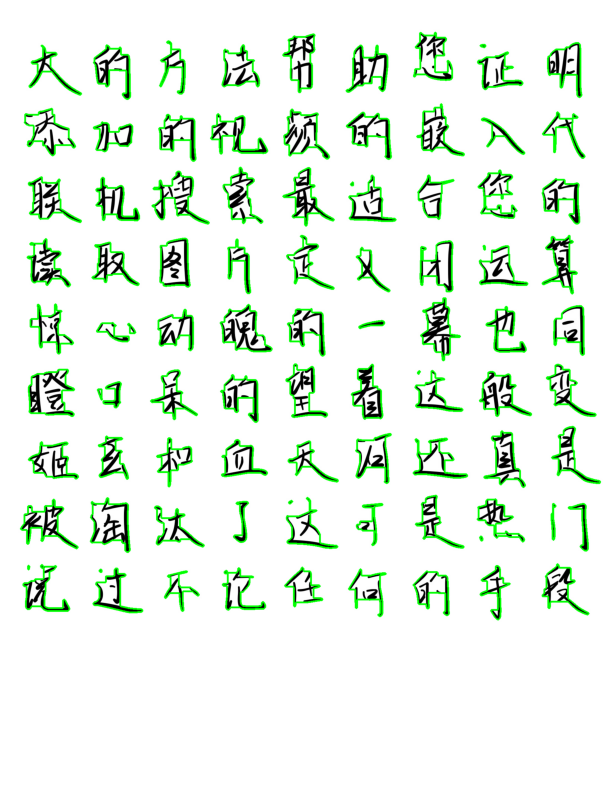

In [159]:
# 轮廓
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
imshow(img,cmap='gray')

In [160]:
type(contours), len(contours)

(tuple, 93)

In [161]:
contour=contours[0]
type(contour),contour.shape

(numpy.ndarray, (84, 1, 2))

In [162]:
# for contour in contours:
#     rect = cv2.minAreaRect(contour)
#     box = cv2.boxPoints(rect)
#     box = np.int32(box)
#     cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
# imshow(img,cmap='gray')

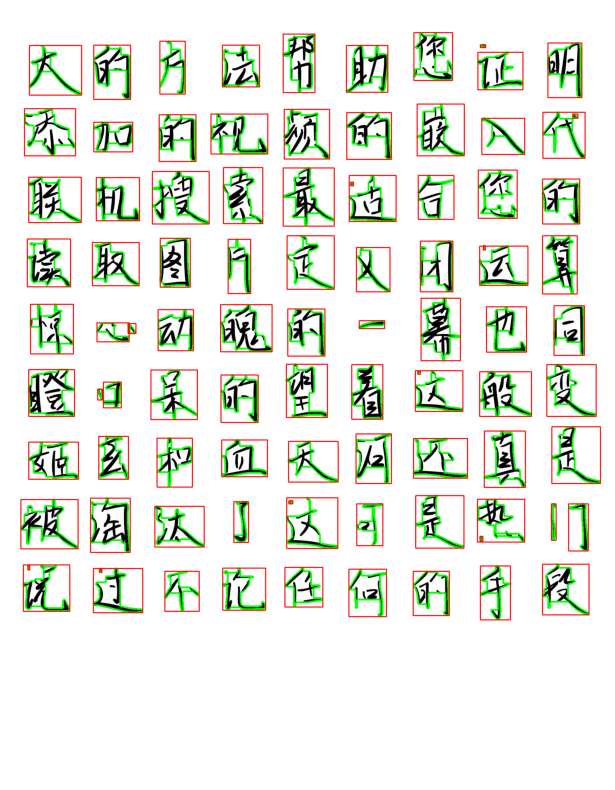

In [163]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
imshow(img)

In [164]:
ctlen=len(contours)

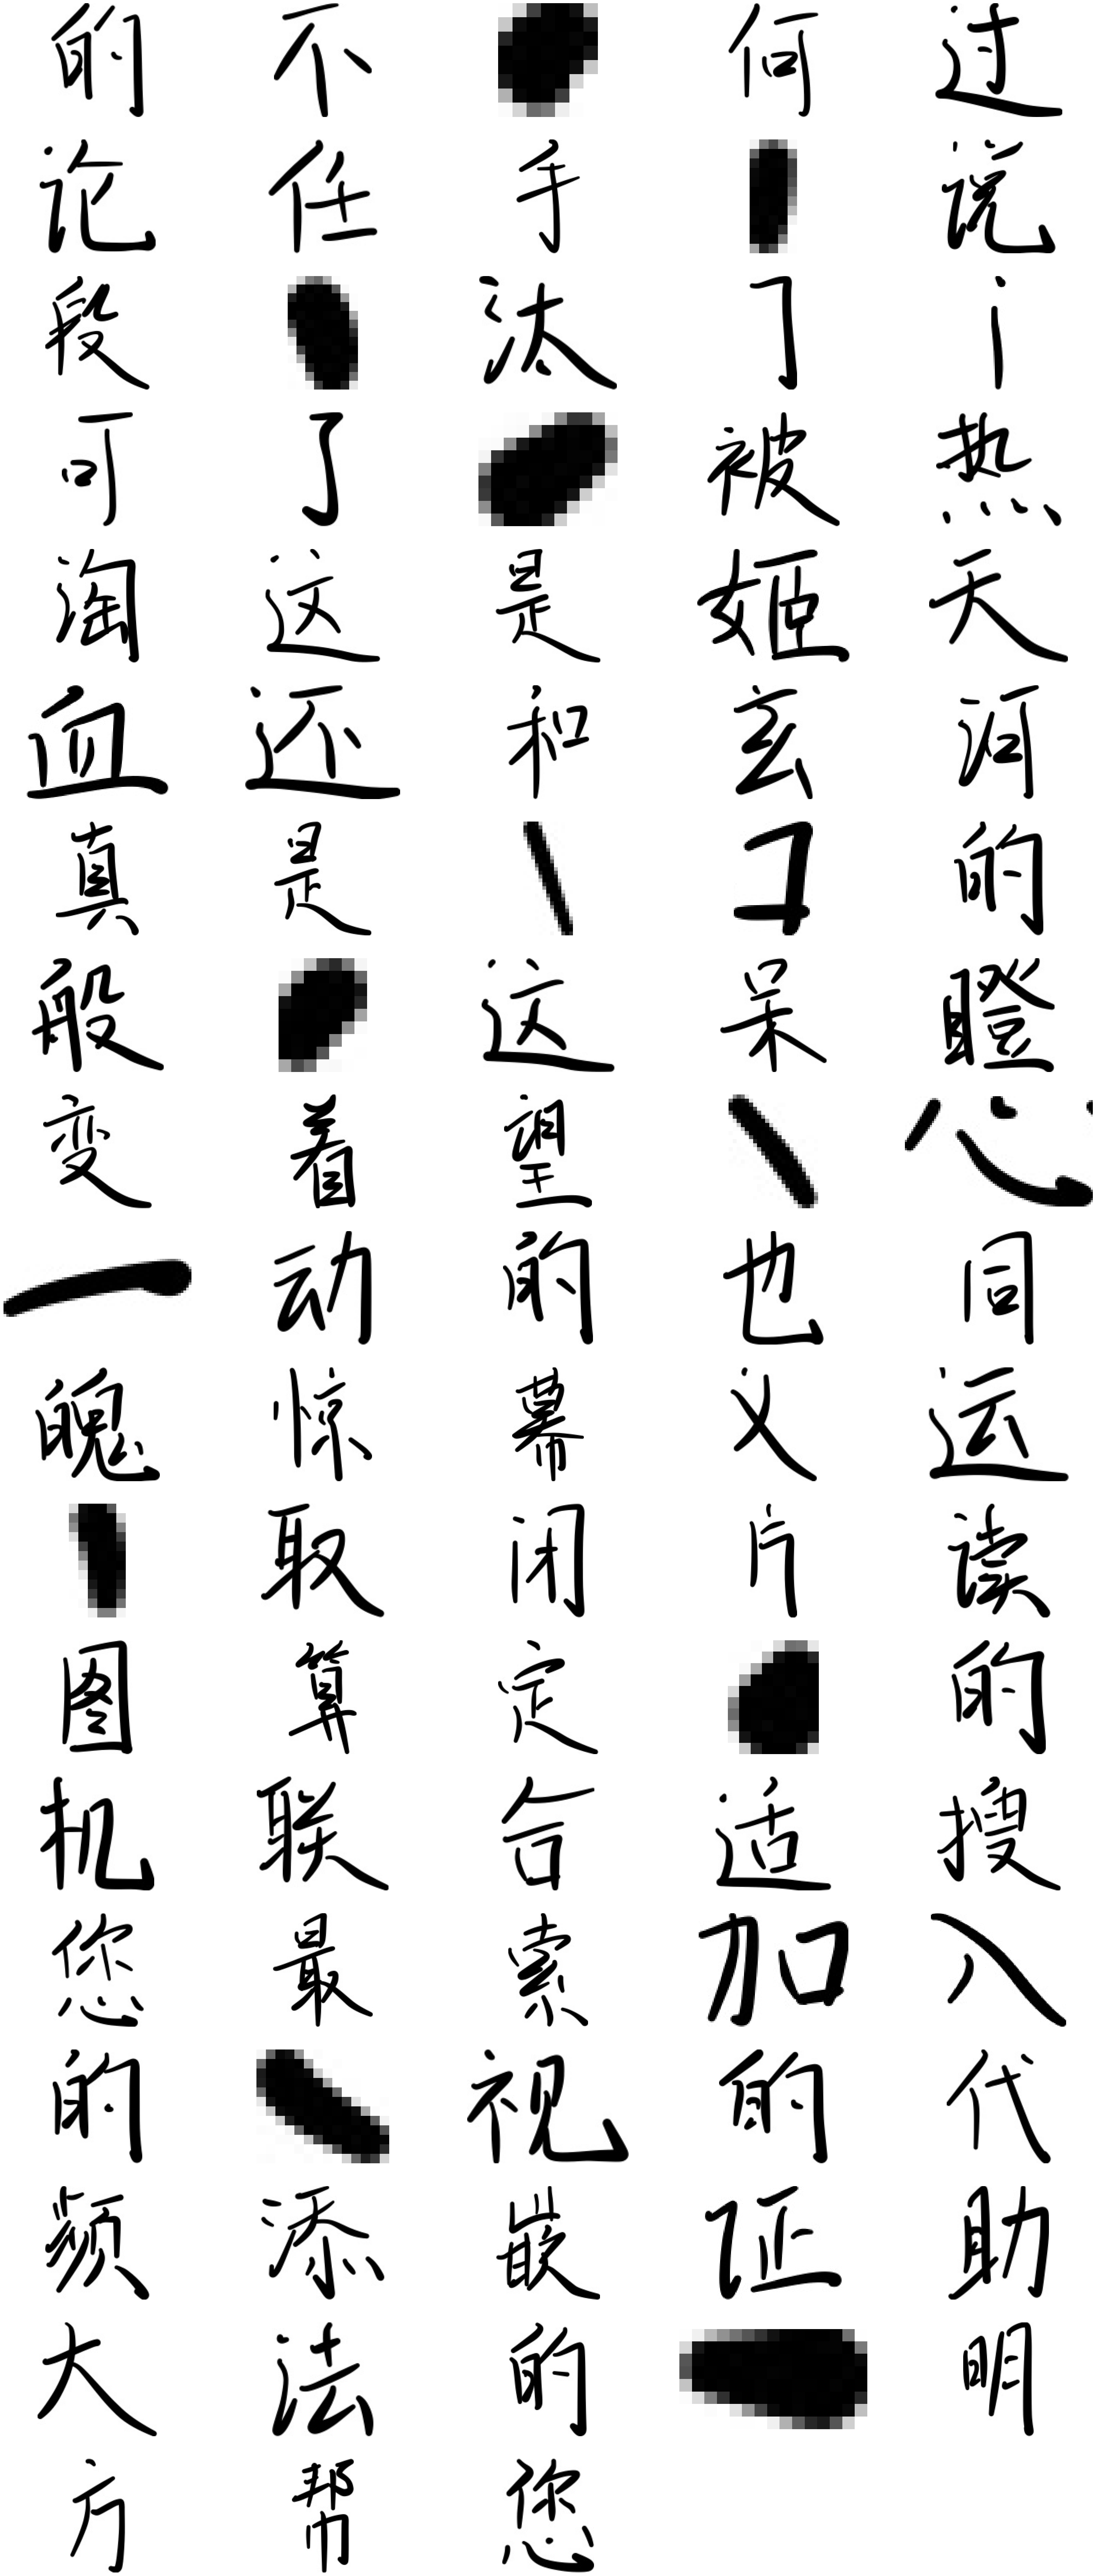

In [165]:
row=int(ctlen/5)+1
fig,axes = plt.subplots(row,5,figsize=(40,5*row))
for i in range(row):
    for j in range(5):
        if i*5+j>=ctlen:
            axes[i][j].axis('off')
            continue
        x, y, w, h = cv2.boundingRect(contours[i*5+j]) 
        axes[i][j].imshow(img_copy[y:y+h,x:x+w],cmap='gray')
        axes[i][j].axis('off')
        cv2.imwrite(f'./output/img'+img_path.stem+str(i*5+j)+'.png',img_copy[y:y+h,x:x+w])